In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_html('https://www.canada.ca/en/immigration-refugees-citizenship/corporate/mandate/policies-operational-instructions-agreements/ministerial-instructions/express-entry-rounds.html')
df = data[0]

In [3]:
df.head(4)

,#,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited,Date (hidden),Programs covered
0,172,"January 7, 2021",Canadian Experience Class,4750,461,7-01-2021,Canadian Experience Class
1,171,"January 6, 2021",Provincial Nominee Program,250,813,6-01-2021,Provincial Nominee Program
2,170,"December 23, 2020",No program specified,5000,468,23-12-2020,Canadian Experience Class Federal Skilled Wor...
3,169,"December 9, 2020",No program specified,5000,469,09-12-2020,Canadian Experience Class Federal Skilled Wor...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   #                                             173 non-null    int64 
 1   Date                                          173 non-null    object
 2   Immigration program                           173 non-null    object
 3   Invitations issued                            173 non-null    int64 
 4   CRS score of lowest-ranked candidate invited  173 non-null    int64 
 5   Date (hidden)                                 173 non-null    object
 6   Programs covered                              173 non-null    object
dtypes: int64(3), object(4)
memory usage: 9.6+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date (hidden)'] = pd.to_datetime(df['Date (hidden)'])

In [6]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['month_year'] = df['Date'].dt.strftime('%b-%Y')
df['month_year'] = pd.to_datetime(df['month_year'])
df['Date Full'] = df['Date'].dt.strftime("%d-%b-%Y")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   #                                             173 non-null    int64         
 1   Date                                          173 non-null    datetime64[ns]
 2   Immigration program                           173 non-null    object        
 3   Invitations issued                            173 non-null    int64         
 4   CRS score of lowest-ranked candidate invited  173 non-null    int64         
 5   Date (hidden)                                 173 non-null    datetime64[ns]
 6   Programs covered                              173 non-null    object        
 7   Month                                         173 non-null    int64         
 8   Year                                          173 non-null    int64   

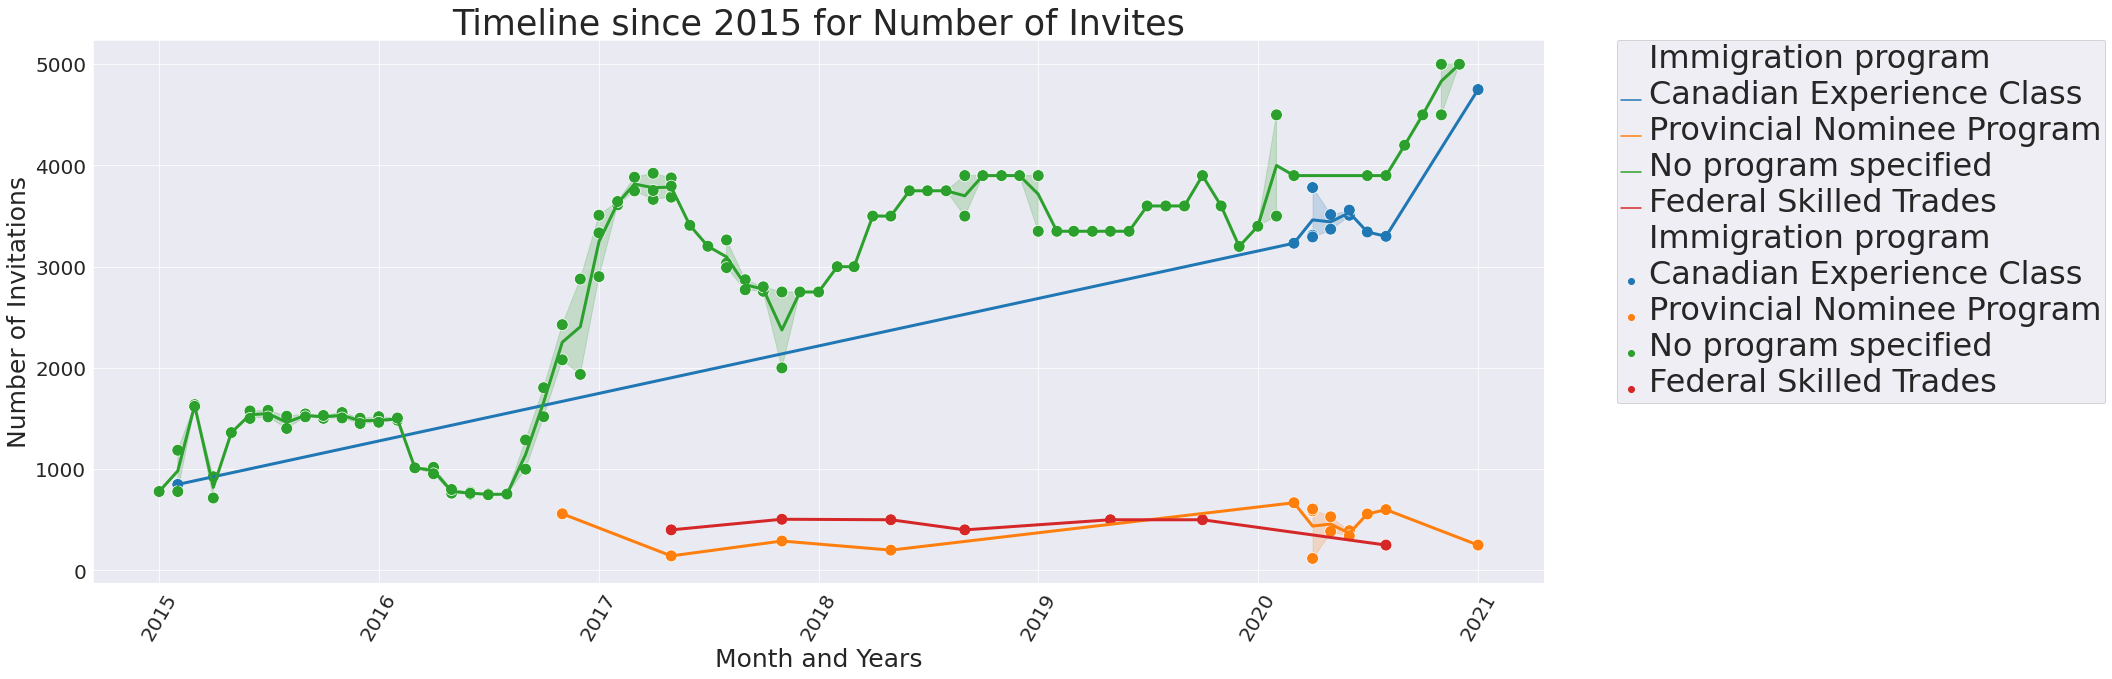

In [8]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='month_year', y= 'Invitations issued', lw=3,data=df,hue='Immigration program')
sns.scatterplot(x='month_year', y= 'Invitations issued', data=df, hue='Immigration program', s=140)
g =plt.xticks(rotation=60)
s.set_xlabel('Month and Years', fontsize=25)
s.set_ylabel('Number of Invitations', fontsize=25)
s.set_title('Timeline since 2015 for Number of Invites', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

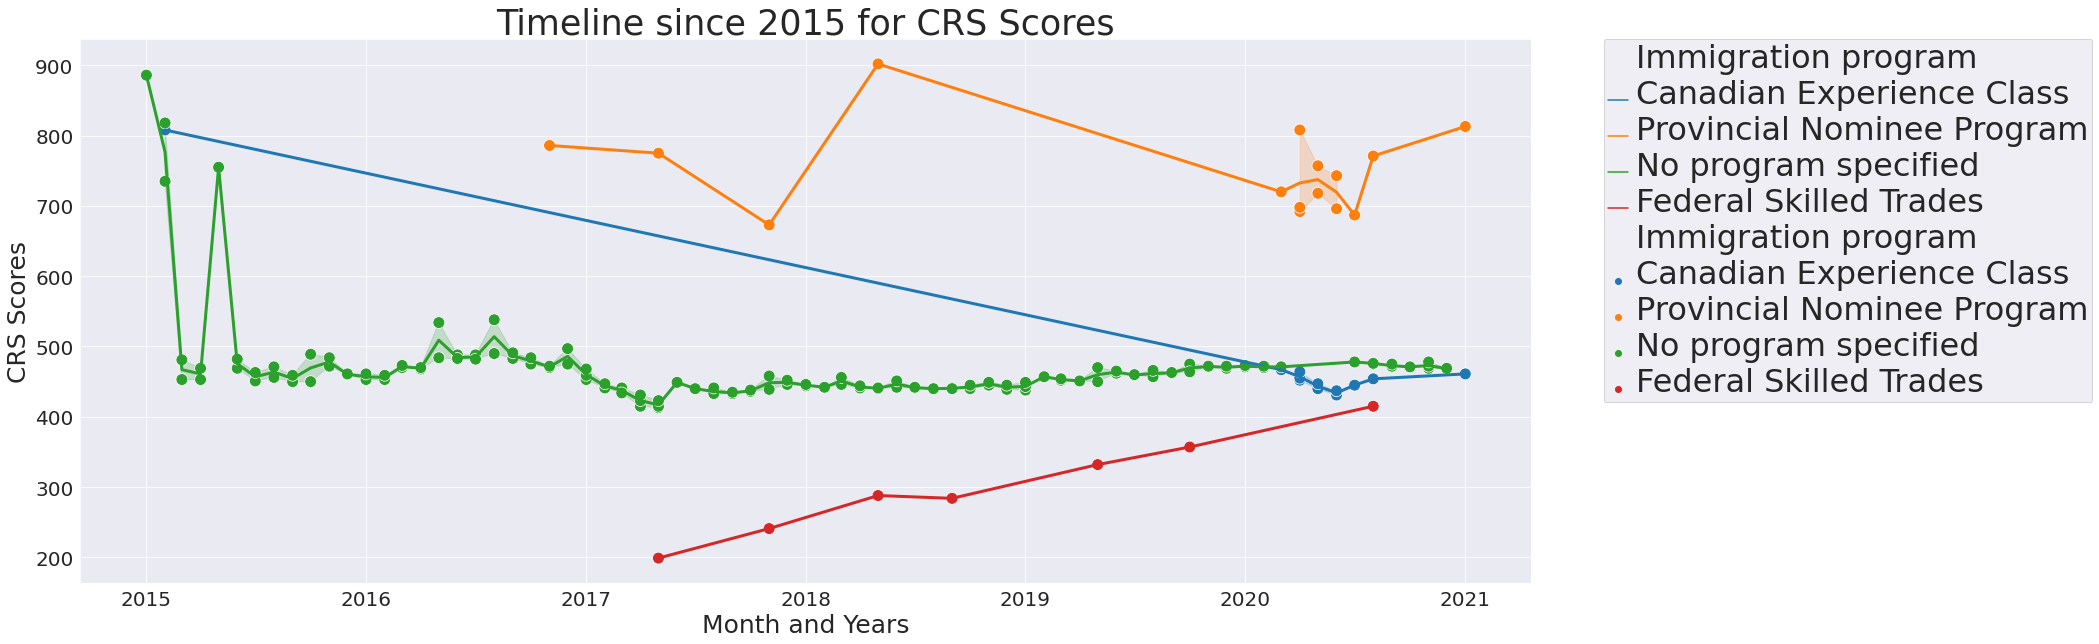

In [9]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='month_year', y= 'CRS score of lowest-ranked candidate invited',lw=3, data=df, hue='Immigration program')
sns.scatterplot(x='month_year', y= 'CRS score of lowest-ranked candidate invited', data=df, hue='Immigration program', s=140)
g =plt.xticks(rotation=0)
s.set_xlabel('Month and Years', fontsize=25)
s.set_ylabel('CRS Scores', fontsize=25)
s.set_title('Timeline since 2015 for CRS Scores', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)


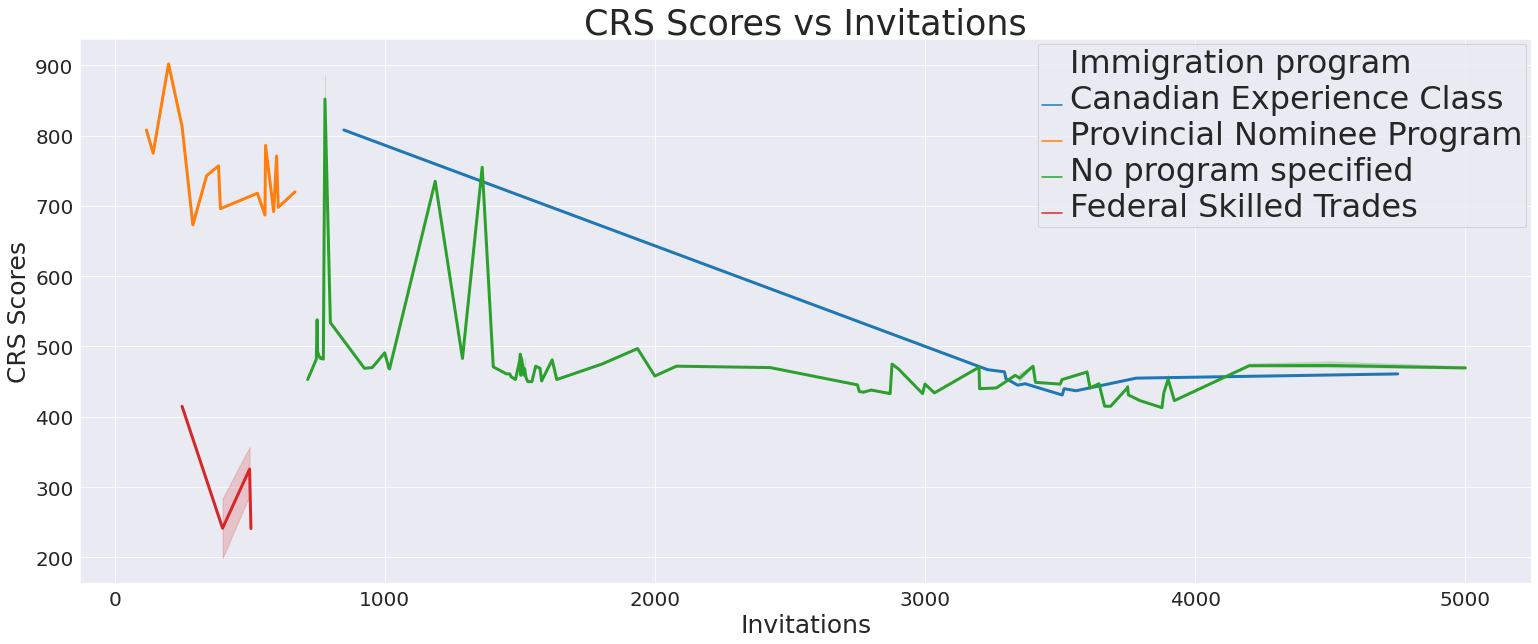

In [10]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='Invitations issued', y= 'CRS score of lowest-ranked candidate invited',lw=3, data=df, hue='Immigration program')
g =plt.xticks(rotation=0)
s.set_xlabel('Invitations', fontsize=25)
s.set_ylabel('CRS Scores', fontsize=25)
s.set_title('CRS Scores vs Invitations', fontsize=35)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

In [11]:
df_all = df[df['Immigration program'] == 'No program specified']
df_all = df_all[df_all['Year'] > 2017]

In [12]:
df_m = df_all.groupby('Month').sum().reset_index()
df_m.head()

,Month,#,Invitations issued,CRS score of lowest-ranked candidate invited,Year
0,1,759,23450,3164,14133
1,2,551,17350,2283,10095
2,3,534,16600,2279,10094
3,4,404,13700,1787,8074
4,5,413,13700,1801,8074


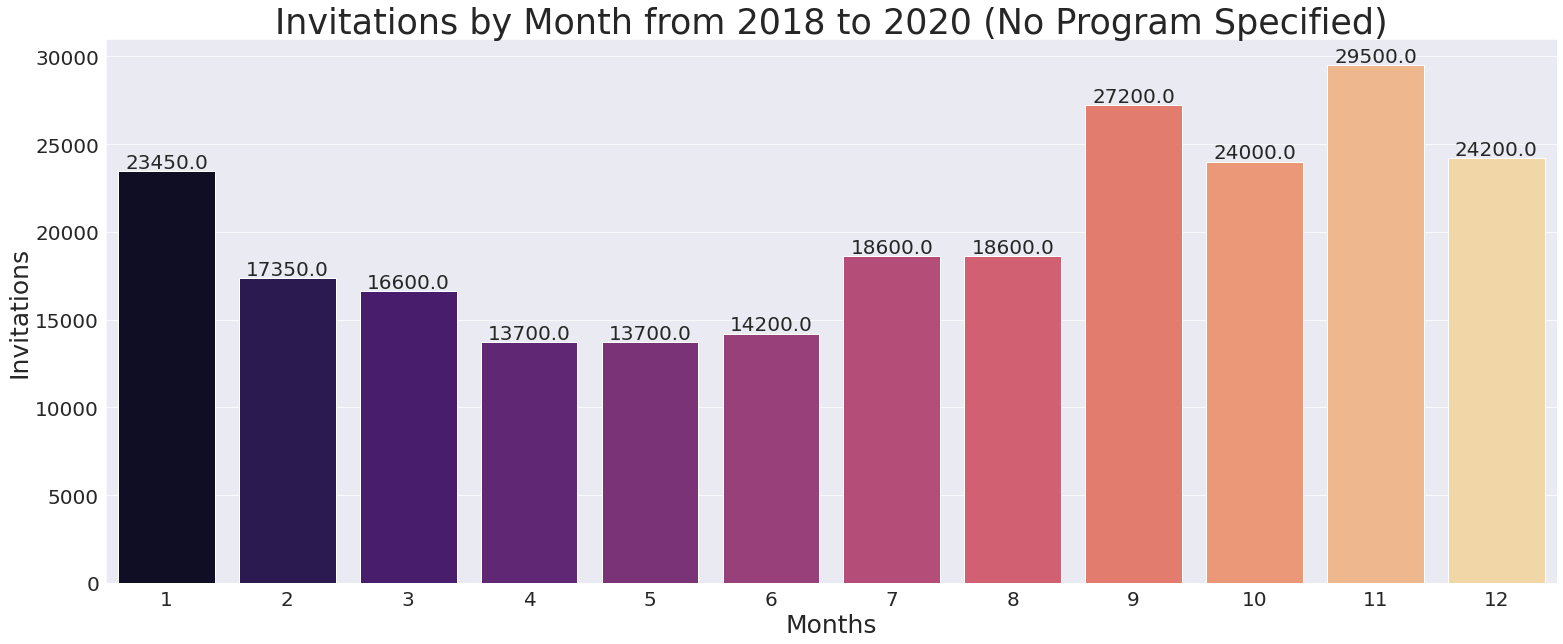

In [13]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Invitations issued', data=df_m, palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')

g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('Invitations', fontsize=25)
f.set_title('Invitations by Month from 2018 to 2020 (No Program Specified)', fontsize=35)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

In [14]:
df_r = df_all.groupby('Month').mean().reset_index()
df_r.head()

,Month,#,Invitations issued,CRS score of lowest-ranked candidate invited,Year
0,1,108.428571,3350.0,452.00,2019.0
1,2,110.200000,3470.0,456.60,2019.0
2,3,106.800000,3320.0,455.80,2018.8
3,4,101.000000,3425.0,446.75,2018.5
4,5,103.250000,3425.0,450.25,2018.5


(430.0, 500.0)

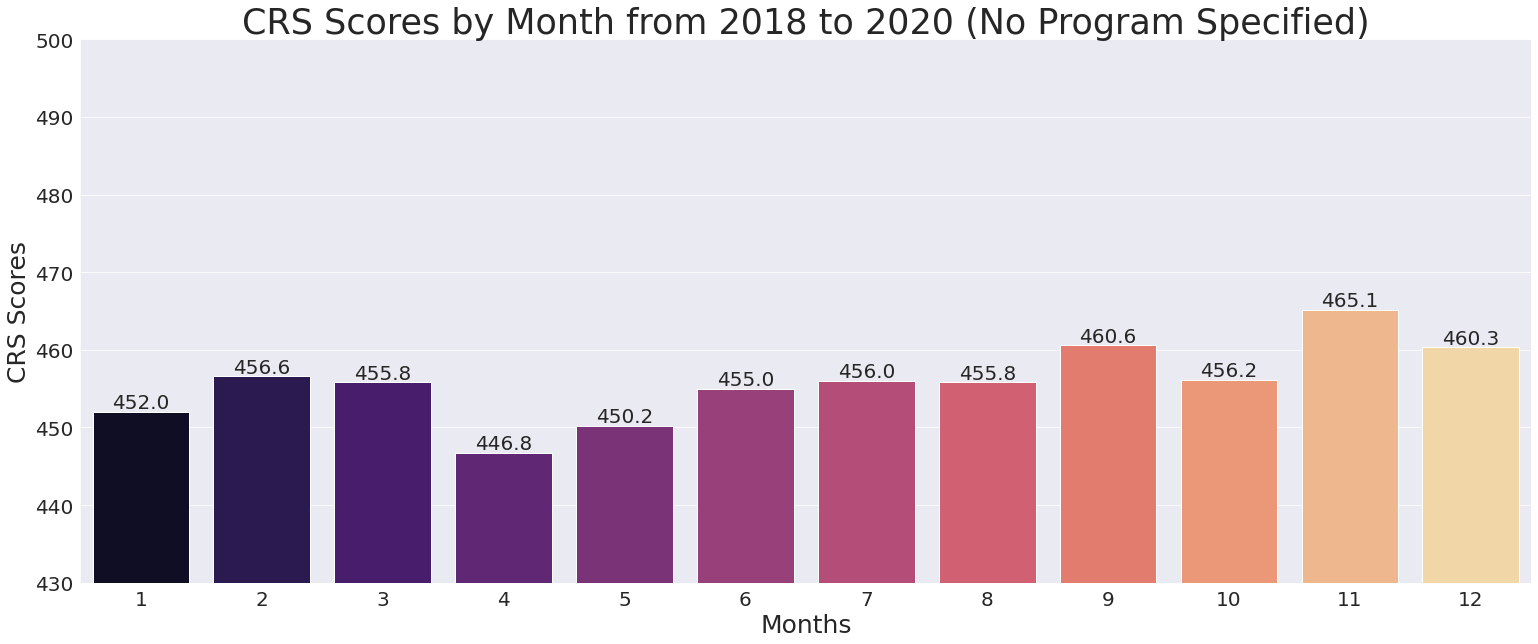

In [15]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='CRS score of lowest-ranked candidate invited', data=df_r, palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')

g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('CRS Scores', fontsize=25)
f.set_title('CRS Scores by Month from 2018 to 2020 (No Program Specified)', fontsize=35)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)
plt.ylim(430,500)

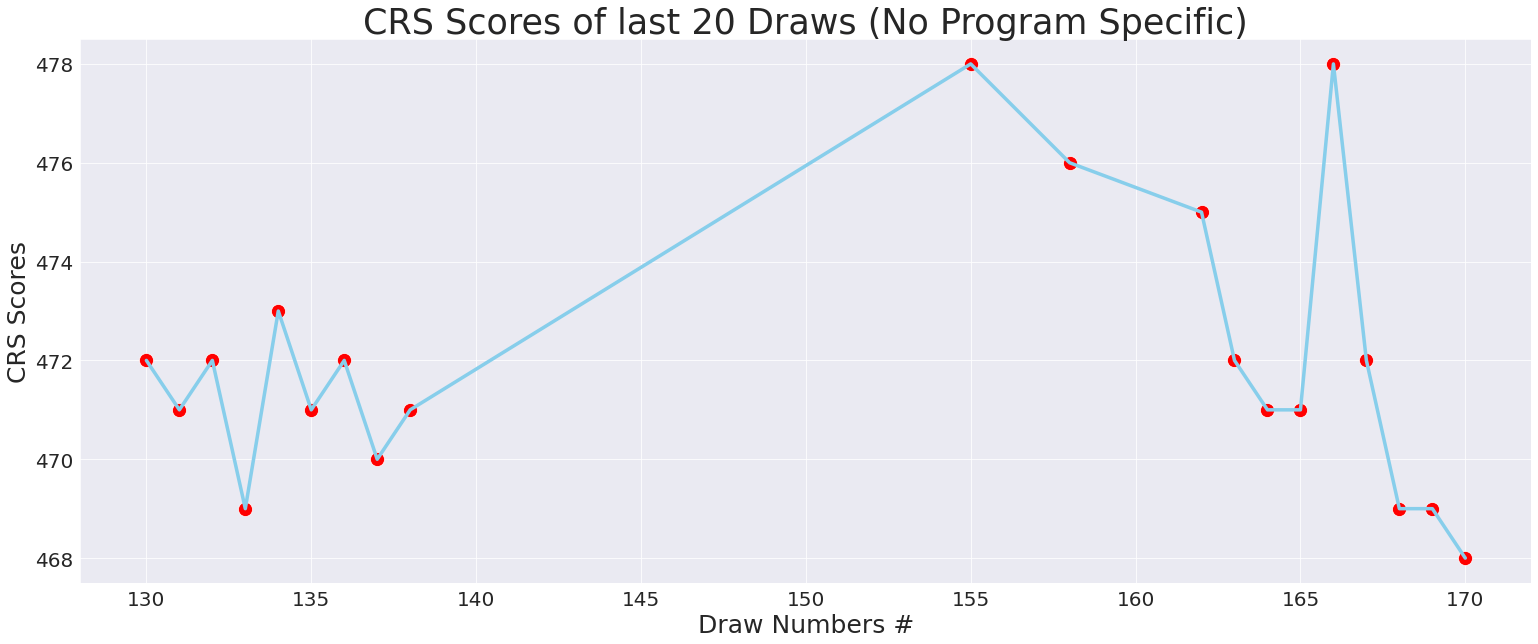

In [16]:
last_20_draws = df_all.iloc[:20]
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='#', y= 'CRS score of lowest-ranked candidate invited', data=last_20_draws, color='skyblue', lw=3.5)
s = sns.scatterplot(x='#', y= 'CRS score of lowest-ranked candidate invited', data=last_20_draws, color='red', s=200)
g =plt.xticks(rotation=0)
s.set_xlabel('Draw Numbers #', fontsize=25)
s.set_ylabel('CRS Scores', fontsize=25)
s.set_title('CRS Scores of last 20 Draws (No Program Specific)', fontsize=35)
#plt.setp(s.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(s.get_legend().get_title(), fontsize='22') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

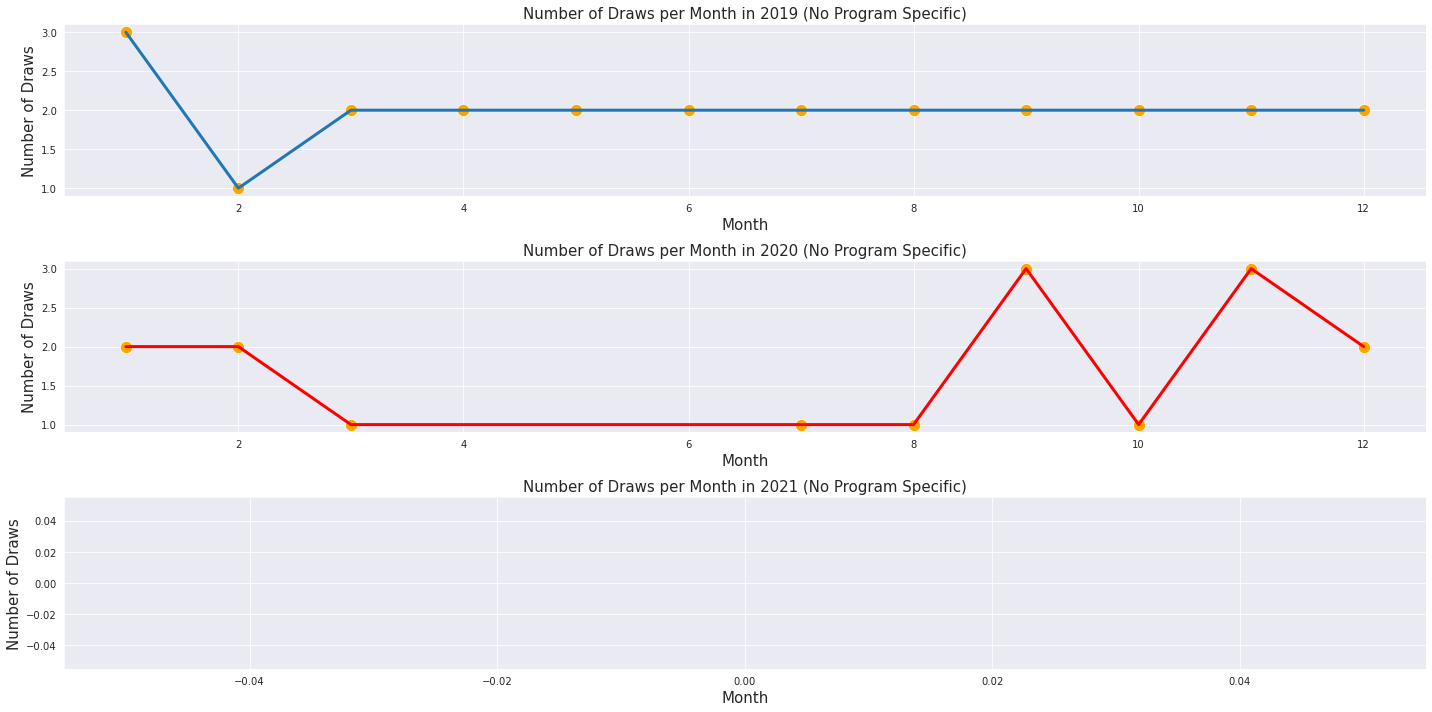

In [17]:
df_19 = df_all[df_all['Year'].isin([2019])].groupby('Month').count().reset_index()
df_20 = df_all[df_all['Year'].isin([2020])].groupby('Month').count().reset_index()
df_21 = df_all[df_all['Year'].isin([2021])].groupby('Month').count().reset_index()

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(20,10))
s = sns.lineplot(x='Month', y= '#', data=df_19, ax=ax[0], lw=3)
s = sns.scatterplot(x='Month', y= '#', data=df_19, ax=ax[0], color='orange', s=150)
s.set_xlabel('Month', fontsize=15)
s.set_ylabel('Number of Draws', fontsize=15)
s.set_title('Number of Draws per Month in 2019 (No Program Specific)', fontsize=15)

w = sns.lineplot(x='Month', y= '#', data=df_20, ax=ax[1], color='red', lw=3)
w = sns.scatterplot(x='Month', y= '#', data=df_20, ax=ax[1], color='orange', s=150)
w.set_xlabel('Month', fontsize=15)
w.set_ylabel('Number of Draws', fontsize=15)
w.set_title('Number of Draws per Month in 2020 (No Program Specific)', fontsize=15)

t = sns.lineplot(x='Month', y= '#', data=df_21, ax=ax[2], color='green', lw=3)
t = sns.scatterplot(x='Month', y= '#', data=df_21, ax=ax[2], color='orange', s=150)
t.set_xlabel('Month', fontsize=15)
t.set_ylabel('Number of Draws', fontsize=15)
t.set_title('Number of Draws per Month in 2021 (No Program Specific)', fontsize=15)

plt.tight_layout()